<a href="https://colab.research.google.com/github/FatemehAbbasi166/Pathrise_Company_Project/blob/main/Data_Visualization_pathrise_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Dataset


In [1]:
from google.colab import files

In [2]:
uploaded= files.upload()

Saving Data_Pathrise.csv to Data_Pathrise.csv


# Import Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read the Data

In [4]:
df=pd.read_csv('Data_Pathrise.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           2544 non-null   int64  
 1   pathrise_status              2544 non-null   object 
 2   primary_track                2544 non-null   object 
 3   cohort_tag                   2536 non-null   object 
 4   program_duration_days        1928 non-null   float64
 5   placed                       2544 non-null   int64  
 6   employment_status            2315 non-null   object 
 7   highest_level_of_education   2486 non-null   object 
 8   length_of_job_search         2470 non-null   object 
 9   biggest_challenge_in_search  2520 non-null   object 
 10  professional_experience      2322 non-null   object 
 11  work_authorization_status    2260 non-null   object 
 12  number_of_interviews         2326 non-null   float64
 13  number_of_applicat

In [6]:
# Summary statistics for numerical columns
df.describe()

id  program_duration_days       placed  number_of_interviews  \
count  2544.000000            1928.000000  2544.000000           2326.000000   
mean   1272.500000             136.098548     0.375786              2.182287   
std     734.533866             125.860248     0.484420              2.959273   
min       1.000000               0.000000     0.000000              0.000000   
25%     636.750000              14.000000     0.000000              0.000000   
50%    1272.500000             112.000000     0.000000              1.000000   
75%    1908.250000             224.000000     1.000000              3.000000   
max    2544.000000             548.000000     1.000000             20.000000   

       number_of_applications  
count             2544.000000  
mean                36.500786  
std                 53.654896  
min                  0.000000  
25%                  9.000000  
50%                 20.000000  
75%                 45.000000  
max               1000.000000

In [7]:
df.head()

id pathrise_status primary_track cohort_tag  program_duration_days  placed  \
0   1          Active           SWE     OCT19A                    NaN       0   
1   2          Active           PSO     JAN20A                    NaN       0   
2   3     Closed Lost        Design     AUG19B                    0.0       0   
3   4     Closed Lost           PSO     AUG19B                    0.0       0   
4   5          Placed           SWE     AUG19A                   89.0       1   

   employment_status  highest_level_of_education length_of_job_search  \
0          Unemployed          Bachelor's Degree           3-5 months   
1          Unemployed    Some College, No Degree           3-5 months   
2  Employed Part-Time            Master's Degree  Less than one month   
3          Contractor          Bachelor's Degree  Less than one month   
4          Unemployed          Bachelor's Degree           1-2 months   

            biggest_challenge_in_search professional_experience  \
0       Hearing back on my applications               3-4 years   
1   Getting past final round interviews               1-2 years   
2  Figuring out which jobs to apply for      Less than one year   
3   Getting past final round interviews      Less than one year   
4       Hearing back on my applications               1-2 years   

  work_authorization_status  number_of_interviews  number_of_applications  \
0            Canada Citizen                   2.0                     900   
1                   Citizen                   6.0                       0   
2                   Citizen                   0.0                       0   
3                   Citizen                   5.0                      25   
4               F1 Visa/OPT                  10.0                     100   

  gender                                 race  
0   Male  Non-Hispanic White or Euro-American  
1   Male  Non-Hispanic White or Euro-American  
2   Male         East Asian or Asian American  
3   Male             Decline to Self Identify  
4   Male         East Asian or Asian American

In [8]:
# Renaming columns to remove leading and trailing whitespaces
df.rename(columns=lambda x: x.strip(), inplace=True)

In [9]:
# Removing first column
df.drop(columns='id',  inplace= True) # df.drop('id', axis=1,inplace= True)

# Data Understanding

In [10]:
df.shape

(2544, 15)

In [11]:
df.columns

Index(['pathrise_status', 'primary_track', 'cohort_tag',
       'program_duration_days', 'placed', 'employment_status',
       'highest_level_of_education', 'length_of_job_search',
       'biggest_challenge_in_search', 'professional_experience',
       'work_authorization_status', 'number_of_interviews',
       'number_of_applications', 'gender', 'race'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   pathrise_status              2544 non-null   object 
 1   primary_track                2544 non-null   object 
 2   cohort_tag                   2536 non-null   object 
 3   program_duration_days        1928 non-null   float64
 4   placed                       2544 non-null   int64  
 5   employment_status            2315 non-null   object 
 6   highest_level_of_education   2486 non-null   object 
 7   length_of_job_search         2470 non-null   object 
 8   biggest_challenge_in_search  2520 non-null   object 
 9   professional_experience      2322 non-null   object 
 10  work_authorization_status    2260 non-null   object 
 11  number_of_interviews         2326 non-null   float64
 12  number_of_applications       2544 non-null   int64  
 13  gender            

In [13]:
df.isnull().sum()

pathrise_status                  0
primary_track                    0
cohort_tag                       8
program_duration_days          616
placed                           0
employment_status              229
highest_level_of_education      58
length_of_job_search            74
biggest_challenge_in_search     24
professional_experience        222
work_authorization_status      284
number_of_interviews           218
number_of_applications           0
gender                         492
race                            18
dtype: int64

In [14]:
df.isnull().sum().sum()

2243

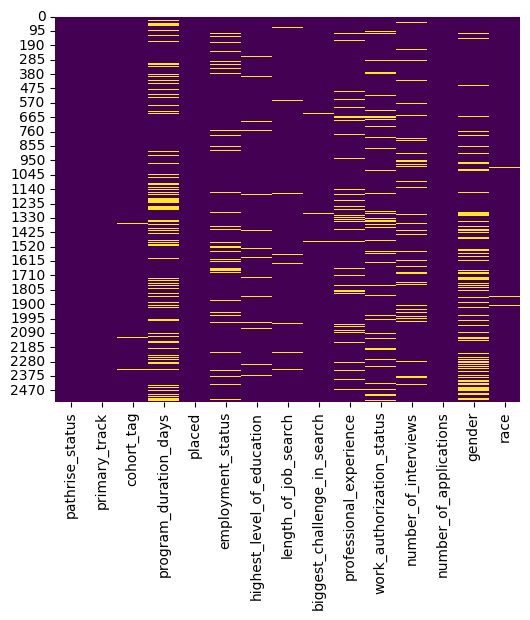

In [15]:
plt.figure(figsize=(6, 5))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.show()

In [16]:
# Styling the DataFrame directly
styled_df = df.isna().sum().sort_values(ascending=False).to_frame().style\
    .set_table_styles([
        {
            'selector': 'th',
            'props': [
                ('background-color', 'purple'),
                ('color', 'yellow'),
                ('border', '2px solid black')
            ]
        },
        {
            'selector': 'td',
            'props': [
                ('background-color', 'yellow'),  # Change to your desired background color for values
                ('color', 'purple'),  # Change to your desired text color for values
                ('border', '2px solid black')
            ]
        }
    ])

# Display the styled DataFrame
styled_df



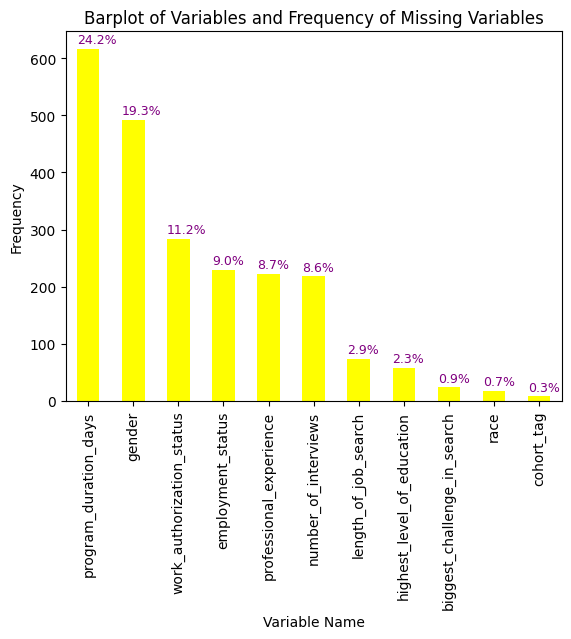

In [17]:
# Calculate and filter missing values
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False) # Keep only the variables (columns) that have missing values in descending order.

# Create a bar plot
ax = missing.plot(kind='bar', alpha=1, color='yellow')

# Set plot properties
ax.set_title("Barplot of Variables and Frequency of Missing Variables")
ax.set_ylabel("Frequency")
ax.set_xlabel('Variable Name')

# Add text labels above each bar in the bar plot.
#The total number of data points: len(df)=2544
for i in ax.patches:
    ax.text(i.get_x(), i.get_height() + 10,
            f"{round((i.get_height()/len(df))*100, 1)}%", fontsize=9, color='purple')

plt.show()

In [18]:
cols=['primary_track', 'employment_status',
       'highest_level_of_education', 'length_of_job_search',
       'biggest_challenge_in_search', 'professional_experience',
       'work_authorization_status', 'gender', 'race']
dic_pivot={}
for col in cols:
    pivot_table1=pd.pivot_table(df[[col,'placed']],index='placed', columns=col, aggfunc='size')
    column_total=pivot_table1.sum()
    pivot_table2=pivot_table1.divide(column_total)*100
    pivot_table2.index=['Not placed %','Placed %']
    row_total=column_total.sum()
    population=column_total.divide(row_total)*100
    pivot_table2.loc['population %']=population
    dic_pivot[col]=pivot_table2
    ptivot_heat=pivot_table2.style.background_gradient(cmap ='viridis').format("{:.2f}")
    display(ptivot_heat)
    #ptivot_heat.to_excel(file_path+'{}_pivot.xlsx'.format(col))

In [19]:
df['pathrise_status'].value_counts()

pathrise_status
Placed                956
Active                532
Withdrawn             398
Withdrawn (Trial)     276
Closed Lost           182
Withdrawn (Failed)     82
MIA                    52
Deferred               34
Break                  32
Name: count, dtype: int64

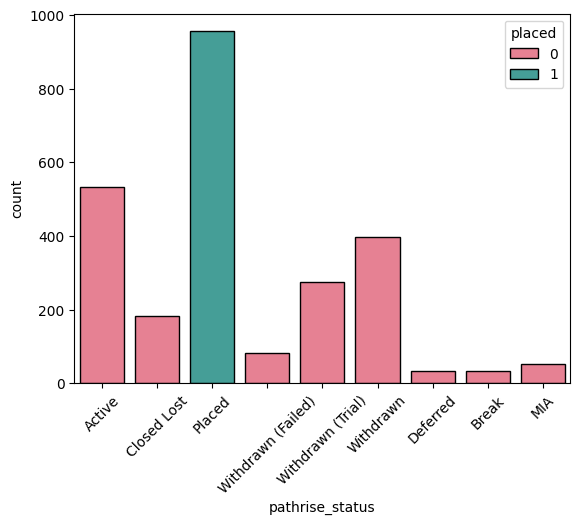

In [20]:
sns.countplot(data=df, x='pathrise_status', hue='placed', edgecolor='black',palette='husl')
plt.xticks(rotation=45)  # Rotating x-axis labels by 45 degrees
plt.show()

In [21]:
df['primary_track'].value_counts()

primary_track
SWE          1678
PSO           322
Design        288
Data          248
Web             6
Marketing       2
Name: count, dtype: int64

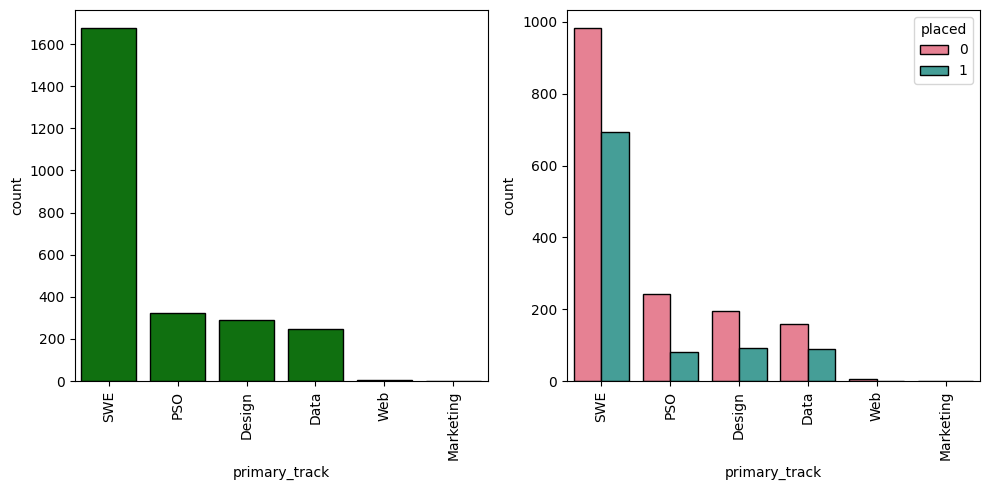

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
categorical_column = 'primary_track'

# First subplot (top-left)
sns.countplot(data=df, x='primary_track', edgecolor='black', ax=axes[0], color='green')
axes[0].tick_params(axis='x', rotation=90)

# Second subplot (top-right)
sns.countplot(data=df, x='primary_track', hue='placed', edgecolor='black', ax=axes[1],palette='husl' )
axes[1].tick_params(axis='x', rotation=90)

# Adjust layout
plt.tight_layout()
plt.show()

In [23]:
df['employment_status'].value_counts()

employment_status
Student               775
Unemployed            665
Employed Full-Time    435
Employed Part-Time    270
Contractor            170
Name: count, dtype: int64

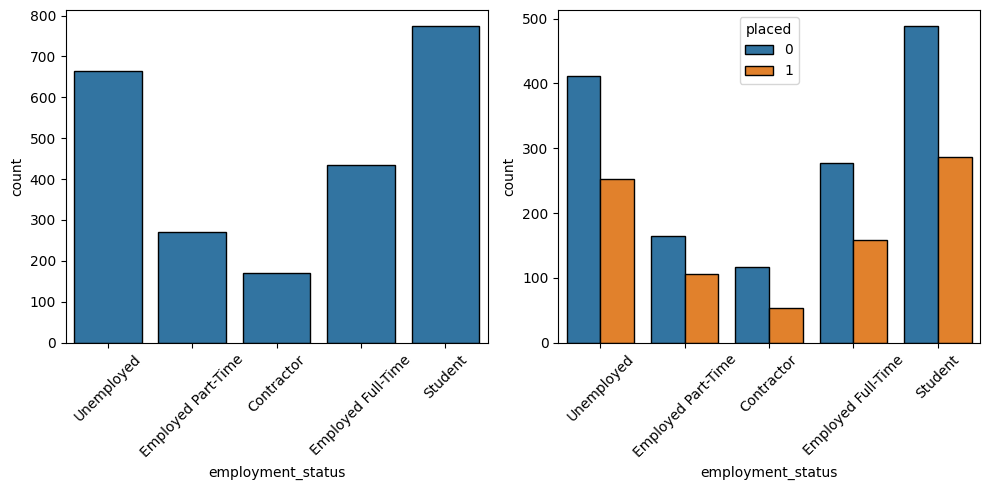

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
categorical_column = 'employment_status '

# First subplot (top-left)
sns.countplot(x='employment_status', data=df, edgecolor='black', ax=axes[0])

# Second subplot (top-right)
sns.countplot(data=df, x='employment_status', hue='placed', edgecolor='black', ax=axes[1])

# Rotate x-axis labels for the last two subplots
axes[0].tick_params(axis='x', rotation=45)
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

In [25]:
df['cohort_tag'].value_counts()

cohort_tag
JAN19A    132
JAN20A    124
DEC18A    116
FEB20A    108
AUG19C     88
OCT18B     84
OCT18A     82
AUG19B     82
JAN20B     82
JAN19B     74
MAR19A     74
OCT19A     68
SEP19B     66
JUL19A     66
JUN19B     64
DEC19A     64
FEB19A     64
NOV18A     62
NOV19A     62
SEP19A     60
AUG19A     60
OCT19B     54
SEP18C     54
JUN19A     54
SEP18B     50
AUG18A     50
SEP18A     48
APR19A     48
JUN18A     48
JUL19B     44
MAR19B     44
FEB19B     42
NOV19B     40
APR19B     34
MAY18A     32
MAR18A     30
APR18B     30
FEB18A     30
FEB20B     28
APR18A     24
MAY19B     20
MAY19A     18
MAR20A     10
JAN18A     10
APR20A      6
FEB20a      4
OCT21A      2
Name: count, dtype: int64

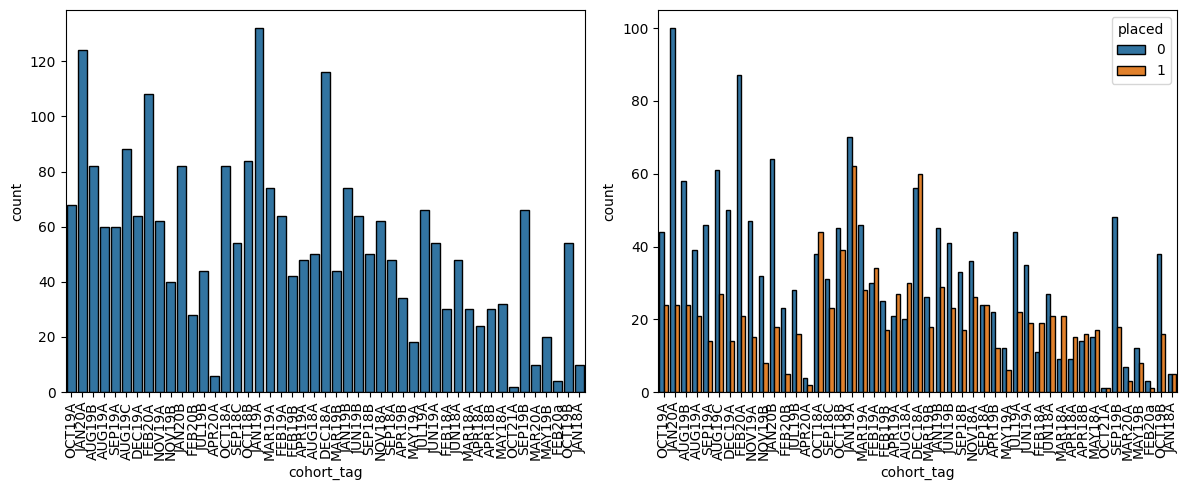

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
categorical_column = 'cohort_tag'
# First subplot (top-left)
sns.countplot(data=df, x='cohort_tag', edgecolor='black', ax=axes[0])
axes[0].tick_params(axis='x', rotation=90)
# Second subplot (top-right)
sns.countplot(data=df, x='cohort_tag', hue='placed', edgecolor='black', ax=axes[1])
axes[1].tick_params(axis='x', rotation=90)
# Adjust layout
plt.tight_layout()
plt.show()

<ipython-input-27-34830d30b114>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='placed', y='program_duration_days', data=df, palette=colors, ax=ax1)
<ipython-input-27-34830d30b114>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='placed', y='number_of_interviews', data=df, palette=colors, ax=ax2)
<ipython-input-27-34830d30b114>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='placed', y='number_of_applications', data=df, palette=colors, ax=ax3)


Text(0.5, 1.0, 'number_of_applications')

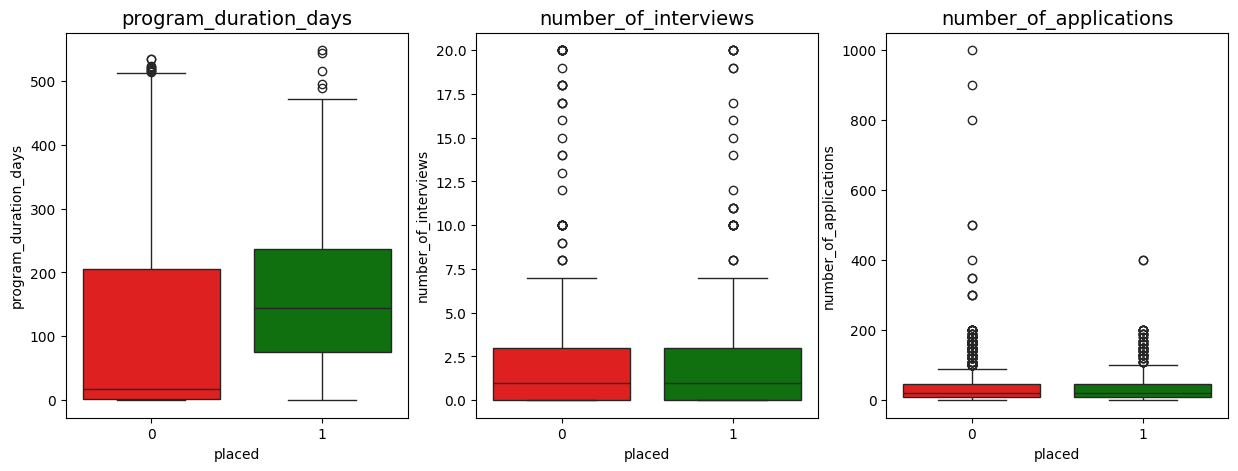

In [27]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

colors = ['red', 'green']
sns.boxplot(x='placed', y='program_duration_days', data=df, palette=colors, ax=ax1)
ax1.set_title("program_duration_days", fontsize=14)


sns.boxplot(x='placed', y='number_of_interviews', data=df, palette=colors, ax=ax2)
ax2.set_title("number_of_interviews", fontsize=14)


sns.boxplot(x='placed', y='number_of_applications', data=df, palette=colors, ax=ax3)
ax3.set_title("number_of_applications", fontsize=14)

In [28]:
df['program_duration_days'].describe()

count    1928.000000
mean      136.098548
std       125.860248
min         0.000000
25%        14.000000
50%       112.000000
75%       224.000000
max       548.000000
Name: program_duration_days, dtype: float64

<ipython-input-29-b754fba20824>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['program_duration_days'],ax=axes[0,1])


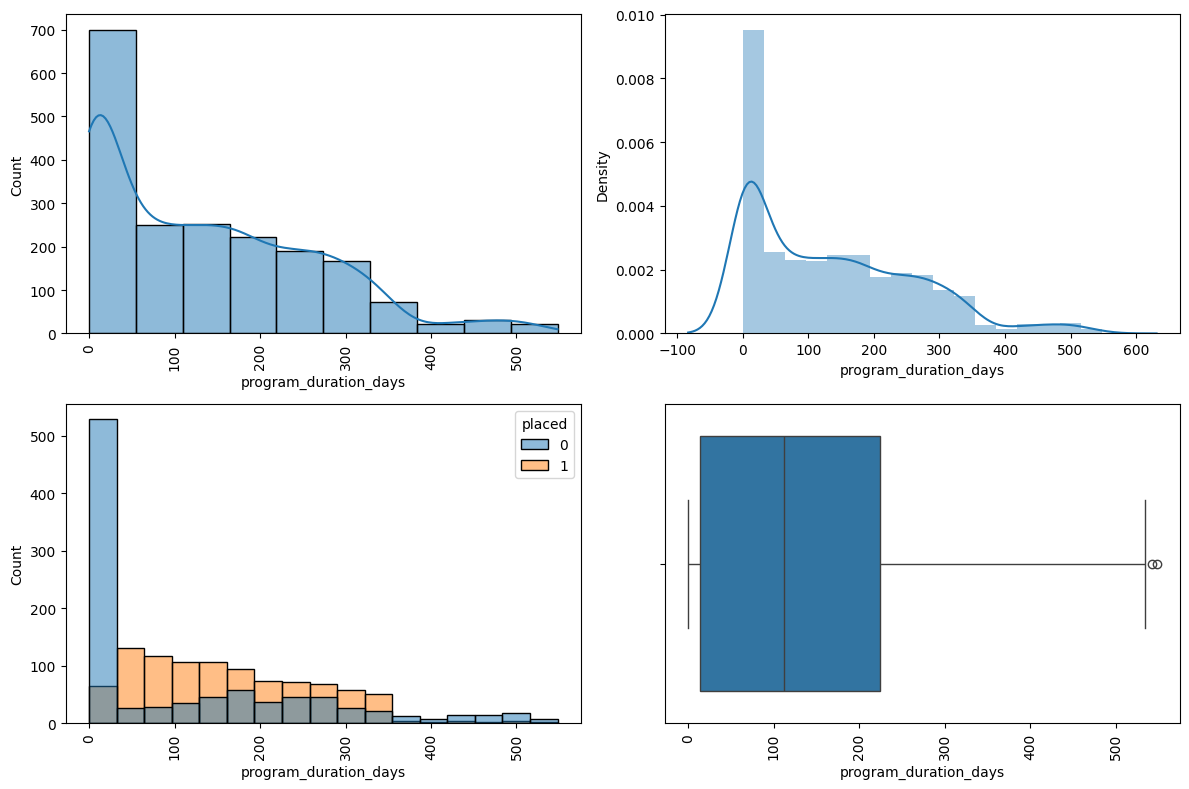

In [29]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
categorical_column = 'program_duration_days'
sns.histplot(x='program_duration_days', data=df, bins=10, kde=True, ax=axes[0,0])
axes[0,0].tick_params(axis='x', rotation=90)
sns.distplot(df['program_duration_days'],ax=axes[0,1])
sns.histplot(data=df, x='program_duration_days', hue='placed', ax=axes[1,0])
axes[1,0].tick_params(axis='x', rotation=90)
sns.boxplot(data=df, x='program_duration_days', ax=axes[1,1])
axes[1,1].tick_params(axis='x', rotation=90)
# Adjust layout
plt.tight_layout()
plt.show()

In [30]:
df['placed'].value_counts()

placed
0    1588
1     956
Name: count, dtype: int64

In [ ]:
df['placed'].describe()

count    2544.000000
mean        0.375786
std         0.484420
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: placed, dtype: float64

([0, 1], [Text(0, 0, '0'), Text(1, 0, '1')])

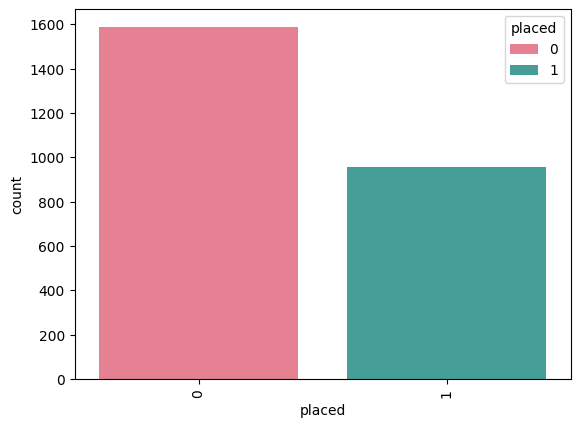

In [31]:
sns.countplot(x='placed',hue='placed',data= df, palette='husl')
plt.xticks(rotation= 90)

In [32]:
df['work_authorization_status'].value_counts()

work_authorization_status
Citizen           1104
F1 Visa/OPT        644
Green Card         184
F1 Visa/CPT        132
Other              112
H1B                 48
Canada Citizen      24
STEM OPT             8
Not Authorized       4
Name: count, dtype: int64

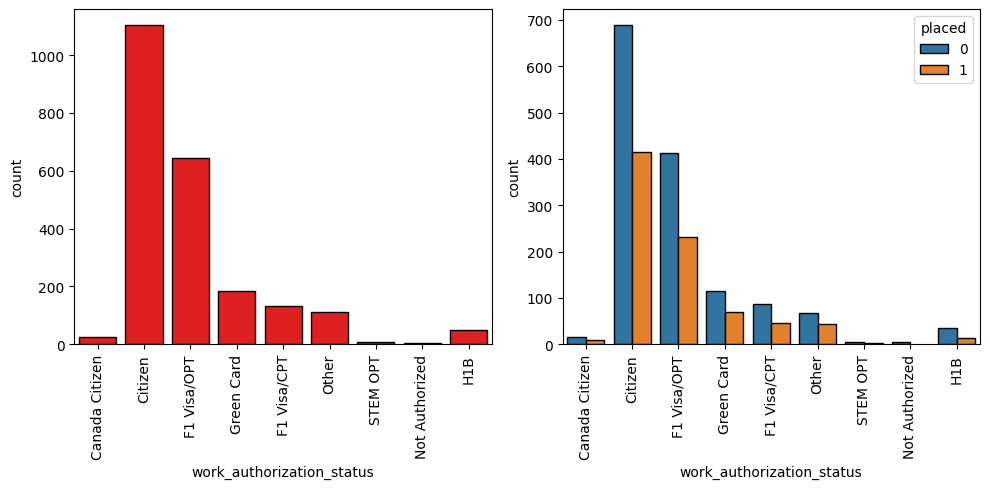

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
categorical_column = 'work_authorization_status'
# First subplot (top-left)
sns.countplot(data=df, x='work_authorization_status', edgecolor='black',color='red', ax=axes[0])
axes[0].tick_params(axis='x', rotation=90)
# Second subplot (top-right)
sns.countplot(data=df, x='work_authorization_status', hue='placed', edgecolor='black', ax=axes[1])
axes[1].tick_params(axis='x', rotation=90)
# Adjust layout
plt.tight_layout()
plt.show()

In [34]:
df['professional_experience'].value_counts()

professional_experience
1-2 years             882
Less than one year    618
3-4 years             558
5+ years              264
Name: count, dtype: int64

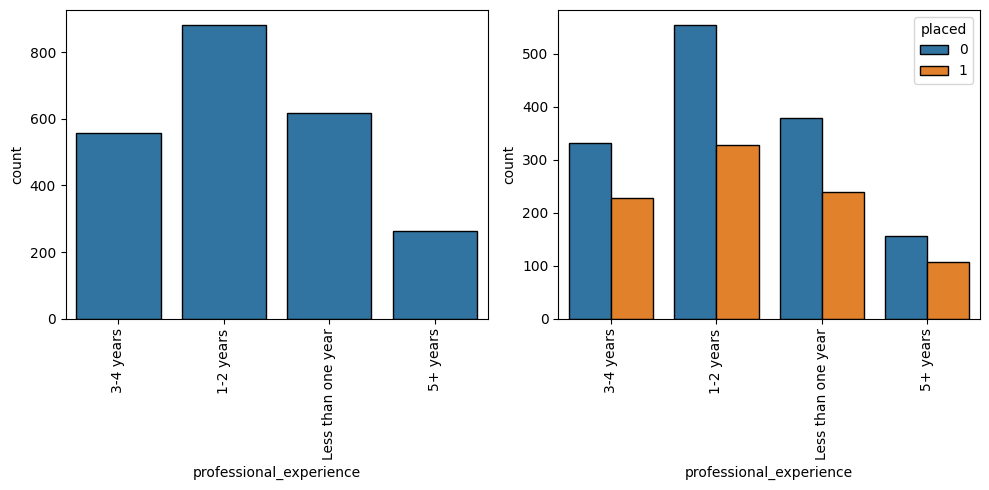

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
categorical_column = 'professional_experience'
# First subplot (top-left)
sns.countplot(data=df, x='professional_experience', edgecolor='black', ax=axes[0])
axes[0].tick_params(axis='x', rotation=90)
# Second subplot (top-right)
sns.countplot(data=df, x='professional_experience', hue='placed', edgecolor='black', ax=axes[1])
axes[1].tick_params(axis='x', rotation=90)
# Adjust layout
plt.tight_layout()
plt.show()

In [36]:
df['highest_level_of_education'].value_counts()

highest_level_of_education
Bachelor's Degree                   1361
Master's Degree                      810
Some College, No Degree              135
Doctorate or Professional Degree     135
High School Graduate                  15
GED or equivalent                     15
Some High School                      15
Name: count, dtype: int64

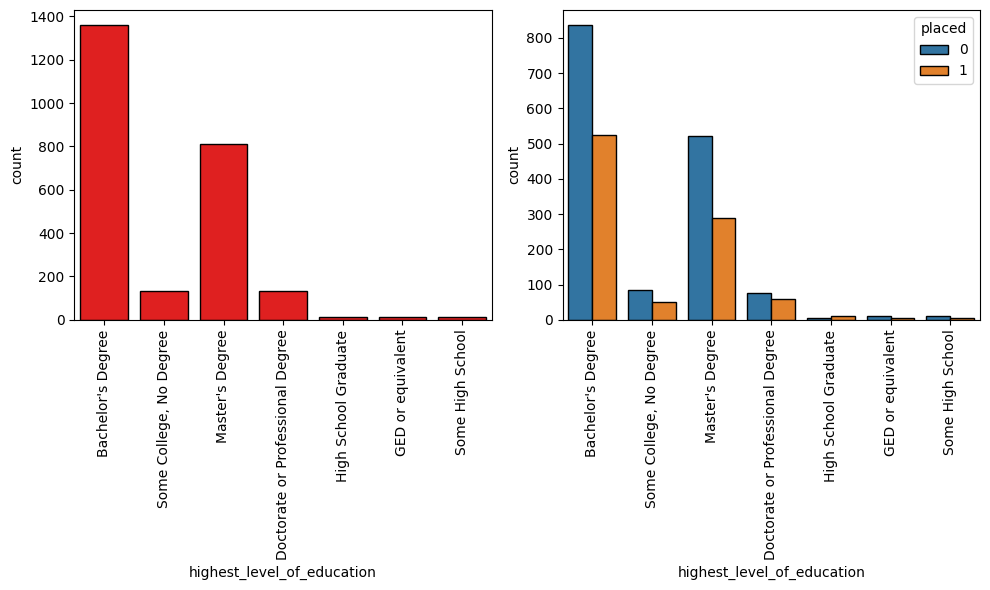

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
categorical_column = 'highest_level_of_education'
# First subplot (top-left)
sns.countplot(data=df, x='highest_level_of_education', edgecolor='black',color='red',ax=axes[0])
axes[0].tick_params(axis='x', rotation=90)
# Second subplot (top-right)
sns.countplot(data=df, x='highest_level_of_education', hue='placed', edgecolor='black', ax=axes[1])
axes[1].tick_params(axis='x', rotation=90)
# Adjust layout
plt.tight_layout()
plt.show()

In [38]:
df['length_of_job_search'].value_counts()

length_of_job_search
Less than one month    815
1-2 months             785
3-5 months             515
6 months to a year     235
Over a year            120
Name: count, dtype: int64

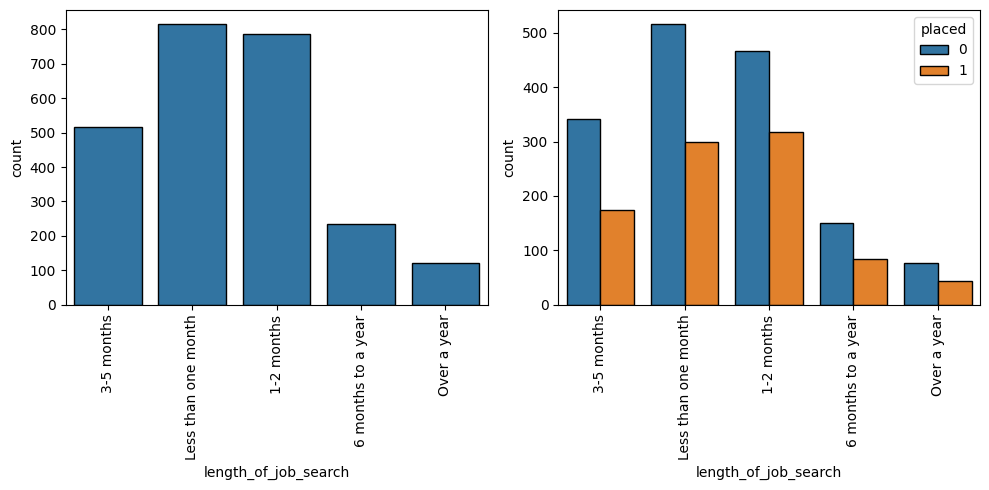

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
categorical_column = 'length_of_job_search'
# First subplot (top-left)
sns.countplot(data=df, x='length_of_job_search', edgecolor='black', ax=axes[0])
axes[0].tick_params(axis='x', rotation=90)
# Second subplot (top-right)
sns.countplot(data=df, x='length_of_job_search', hue='placed', edgecolor='black', ax=axes[1])
axes[1].tick_params(axis='x', rotation=90)
# Adjust layout
plt.tight_layout()
plt.show()

In [40]:
df['biggest_challenge_in_search'].value_counts()

biggest_challenge_in_search
Hearing back on my applications         1002
Getting past final round interviews      294
Technical interviewing                   288
Lack of relevant experience              222
Getting past mid-stage interviews        210
Figuring out which jobs to apply for     186
Getting past phone screens               180
Behavioral interviewing                   60
Resume gap                                42
Technical skills                          36
Name: count, dtype: int64

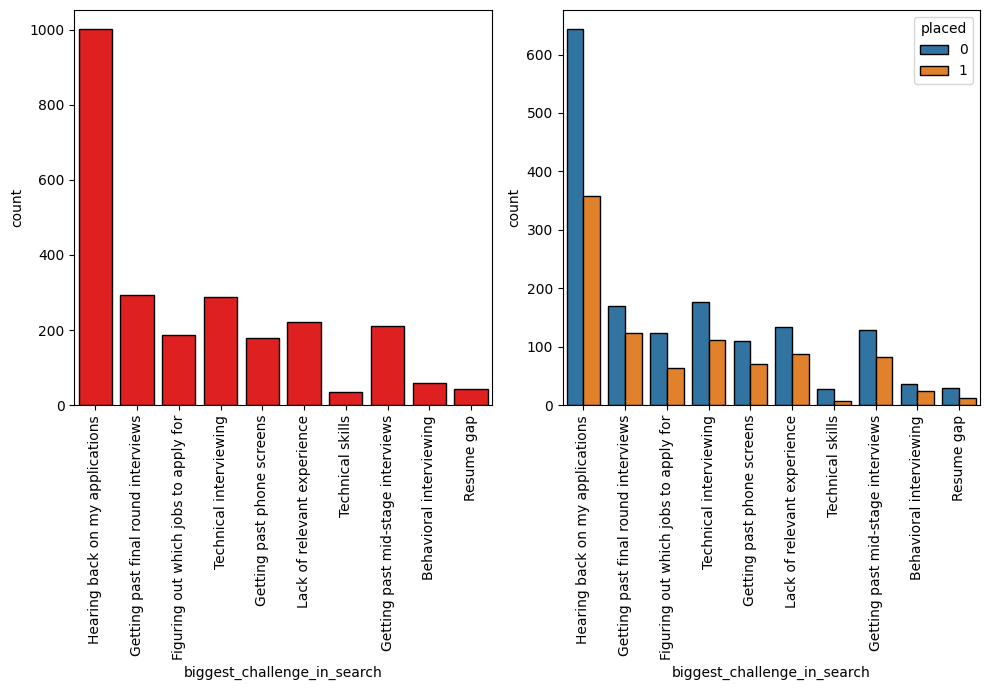

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(10, 7))
categorical_column = 'biggest_challenge_in_search'
# First subplot (top-left)
sns.countplot(data=df, x='biggest_challenge_in_search', edgecolor='black',color='red',ax=axes[0])
axes[0].tick_params(axis='x', rotation=90)
# Second subplot (top-right)
sns.countplot(data=df, x='biggest_challenge_in_search', hue='placed', edgecolor='black', ax=axes[1])
axes[1].tick_params(axis='x', rotation=90)
# Adjust layout
plt.tight_layout()
plt.show()

In [42]:
df['number_of_interviews'].value_counts()

number_of_interviews
0.0     758
1.0     522
2.0     307
3.0     203
4.0     193
5.0     137
6.0      76
7.0      60
10.0     19
20.0     18
8.0       6
11.0      4
18.0      4
17.0      4
19.0      3
14.0      3
15.0      2
9.0       2
16.0      2
12.0      2
13.0      1
Name: count, dtype: int64

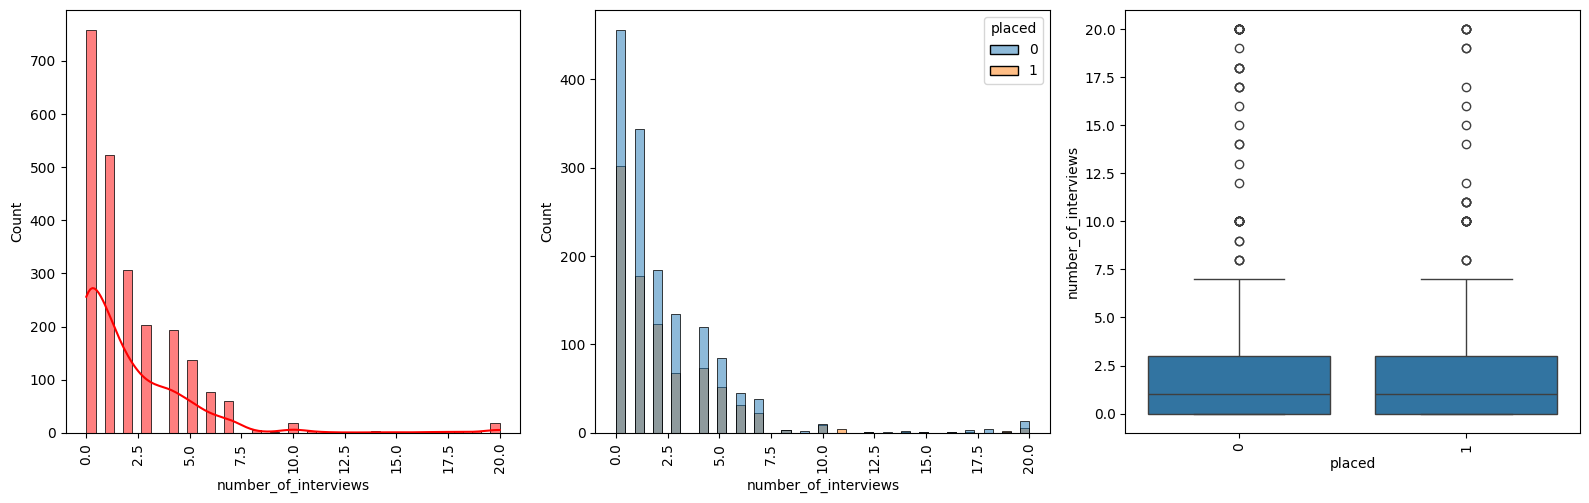

In [43]:
fig, axes = plt.subplots(1, 3, figsize=(16,5))
categorical_column = 'number_of_interviews'
# First subplot (top-left) - Histogram
sns.histplot(x='number_of_interviews', data=df,color= 'red', kde=True, ax=axes[0])
axes[0].tick_params(axis='x', rotation=90)
sns.histplot(data=df, x='number_of_interviews', hue='placed', ax=axes[1])
axes[1].tick_params(axis='x', rotation=90)
# Second subplot (top-right) - Boxplot
sns.boxplot(data=df, x='placed', y='number_of_interviews', ax=axes[2])
axes[2].tick_params(axis='x', rotation=90)
# Adjust layout
plt.tight_layout()
plt.show()

In [44]:
df['number_of_applications'].value_counts()

number_of_applications
15      296
10      193
20      171
25      166
30      156
50      128
60      110
35      105
70       96
40       94
45       81
0        76
7        73
3        72
6        70
2        68
4        67
8        65
9        62
5        59
1        54
80       51
90       36
100      31
200      20
150      18
160      17
130      17
140      16
170      15
110      13
120      12
180      12
190      11
300       3
400       3
500       2
350       2
800       1
1000      1
900       1
Name: count, dtype: int64

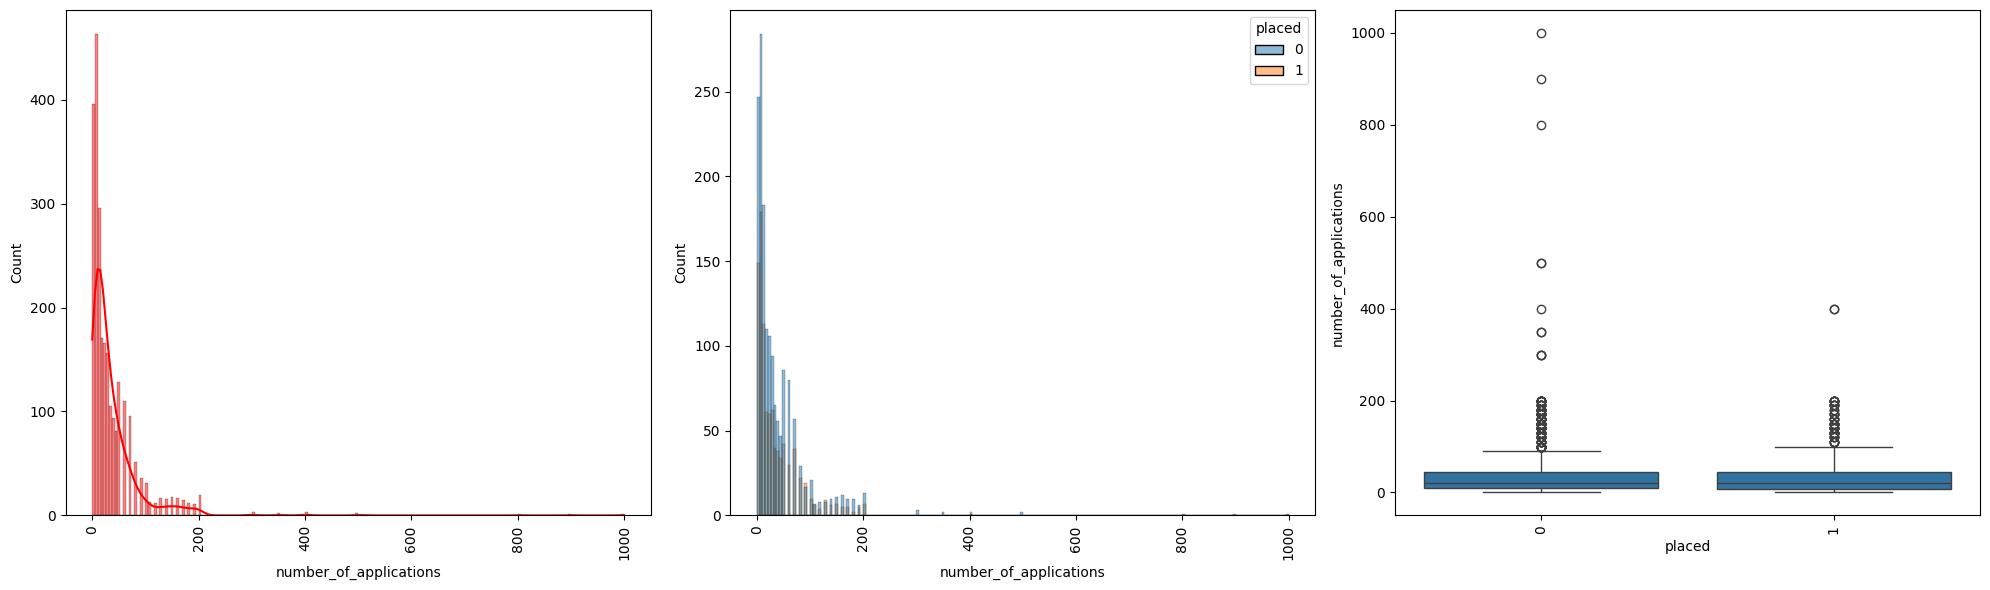

In [45]:
fig, axes = plt.subplots(1, 3, figsize=(20,6))
categorical_column = 'number_of_applications'
# First subplot (top-left) - Histogram
sns.histplot(x='number_of_applications', data=df,color= 'red', kde=True, ax=axes[0])
axes[0].tick_params(axis='x', rotation=90)
sns.histplot(data=df, x='number_of_applications', hue='placed', ax=axes[1])
axes[1].tick_params(axis='x', rotation=90)
# Second subplot (top-right) - Boxplot
sns.boxplot(data=df, x='placed', y='number_of_applications', ax=axes[2])
axes[2].tick_params(axis='x', rotation=90)
# Adjust layout
plt.tight_layout()
plt.show()

In [46]:
df['gender'].value_counts()

gender
Male                        1492
Female                       538
Decline to Self Identify      16
Non-Binary                     6
Name: count, dtype: int64

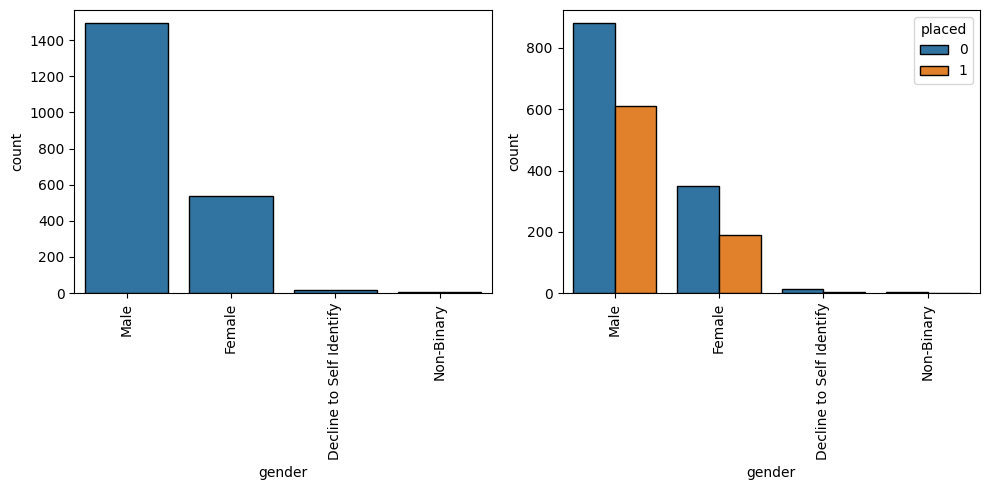

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
categorical_column = 'gender'
# First subplot (top-left)
sns.countplot(data=df, x='gender', edgecolor='black', ax=axes[0])
axes[0].tick_params(axis='x', rotation=90)
# Second subplot (top-right)
sns.countplot(data=df, x='gender', hue='placed', edgecolor='black', ax=axes[1])
axes[1].tick_params(axis='x', rotation=90)
# Adjust layout
plt.tight_layout()
plt.show()

In [48]:
df['race'].value_counts()

race
East Asian or Asian American                  900
Non-Hispanic White or Euro-American           573
South Asian or Indian American                537
Latino or Hispanic American                   156
Black, Afro-Caribbean, or African American    126
Two or More Races                              96
Decline to Self Identify                       69
Middle Eastern or Arab American                66
Native American or Alaskan Native               3
Name: count, dtype: int64

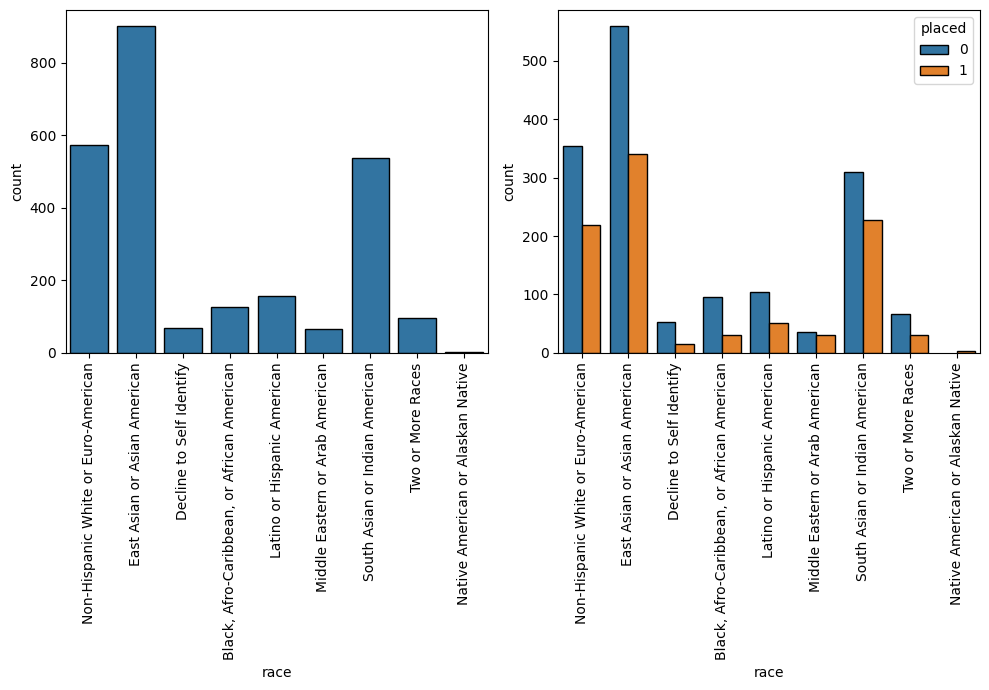

In [49]:
fig, axes = plt.subplots(1, 2, figsize=(10, 7))
categorical_column = 'race'
# First subplot (top-left)
sns.countplot(data=df, x='race', edgecolor='black', ax=axes[0])
axes[0].tick_params(axis='x', rotation=90)
# Second subplot (top-right)
sns.countplot(data=df, x='race', hue='placed', edgecolor='black', ax=axes[1])
axes[1].tick_params(axis='x', rotation=90)
# Adjust layout
plt.tight_layout()
plt.show()

In [50]:
df.columns

Index(['pathrise_status', 'primary_track', 'cohort_tag',
       'program_duration_days', 'placed', 'employment_status',
       'highest_level_of_education', 'length_of_job_search',
       'biggest_challenge_in_search', 'professional_experience',
       'work_authorization_status', 'number_of_interviews',
       'number_of_applications', 'gender', 'race'],
      dtype='object')

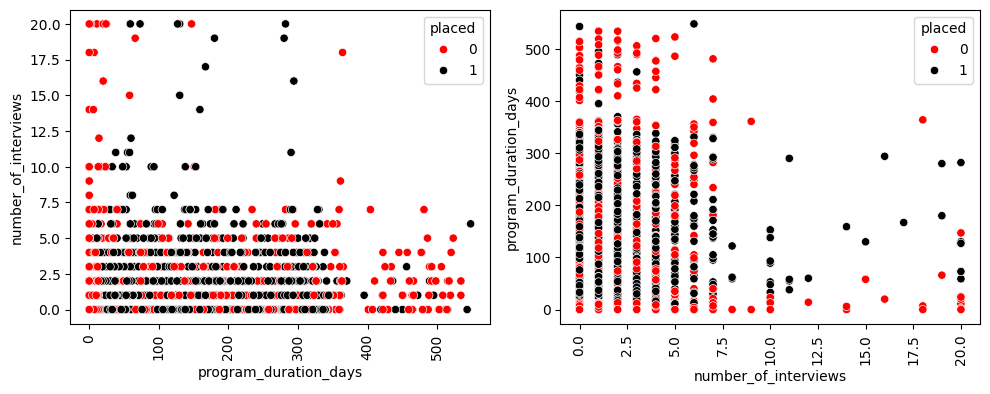

In [51]:
# Assuming df is your DataFrame

# Create a 1x2 grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(10,4))

# Scatterplot in the first subplot (top-left)
my_pallet={0:'red', 1:'black'}
sns.scatterplot(data=df, x='program_duration_days' , y='number_of_interviews', hue='placed', palette= my_pallet,ax=axes[0])
axes[0].tick_params(axis='x', rotation=90)

# Scatterplot in the second subplot (top-center)
my_pallet={0:'red', 1:'black'}
sns.scatterplot(data=df, y='program_duration_days' , x='number_of_interviews', hue='placed', palette= my_pallet, ax=axes[1])
axes[1].tick_params(axis='x', rotation=90)

# Adjust layout for better presentation
plt.tight_layout()

# Show the plot
plt.show()

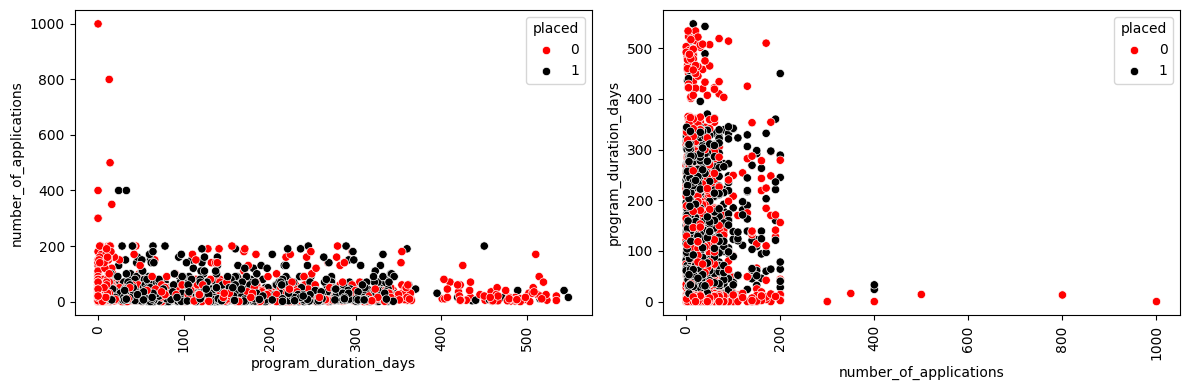

In [52]:
# Assuming df is your DataFrame

# Create a 1x3 grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(12,4))

# Scatterplot in the first subplot (top-left)
my_pallet={0:'red', 1:'black'}
sns.scatterplot(data=df, x='program_duration_days' , y='number_of_applications', hue='placed', palette= my_pallet,ax=axes[0])
axes[0].tick_params(axis='x', rotation=90)

# Scatterplot in the second subplot (top-center)
my_pallet={0:'red', 1:'black'}
sns.scatterplot(data=df, y='program_duration_days' , x='number_of_applications', hue='placed', palette= my_pallet, ax=axes[1])
axes[1].tick_params(axis='x', rotation=90)

# Adjust layout for better presentation
plt.tight_layout()

# Show the plot
plt.show()

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def radial_plot(s):

    df_radil = s.value_counts()
    df_radil = pd.DataFrame(df_radil)
    df_radil.reset_index(inplace=True)
    df_radil.columns = [s.name, 'COUNT']
    df_radil = df_radil.sort_values(by=['COUNT'])

    max_value_full_ring = df_radil['COUNT'].sum()

    start_color = '#2f4b7c'
    end_color = '#ffa600'
    num_steps = len(df_radil)

    start_r, start_g, start_b = int(start_color[1:3], 16), int(start_color[3:5], 16), int(start_color[5:7], 16)
    end_r, end_g, end_b = int(end_color[1:3], 16), int(end_color[3:5], 16), int(end_color[5:7], 16)

    ring_colours = [start_color]

    for i in range(1, num_steps - 1):
        r = start_r + (i * (end_r - start_r)) // (num_steps - 1)
        g = start_g + (i * (end_g - start_g)) // (num_steps - 1)
        b = start_b + (i * (end_b - start_b)) // (num_steps - 1)

        ring_colours.append(f'#{r:02x}{g:02x}{b:02x}')
        ring_colours.append(end_color)

    ring_labels = [f'   {x} ({v}) ' for x, v in zip(list(df_radil[s.name]), list(df_radil['COUNT']))]
    data_len = len(df_radil)

    fig = plt.figure(figsize=(6,6), linewidth=10)
    rect = [0.1, 0.1, 0.8, 0.8]

    ax_polar_bg = fig.add_axes(rect, polar=True, frameon=False)
    ax_polar_bg.set_theta_zero_location('N')
    ax_polar_bg.set_theta_direction(1)

    for i in range(data_len):
        ax_polar_bg.barh(i, 1.5*np.pi, color='grey', alpha=0.1)

    ax_polar_bg.axis('off')

    ax_polar = fig.add_axes(rect, polar=True, frameon=False)
    ax_polar.set_theta_zero_location('N')
    ax_polar.set_theta_direction(1)
    ax_polar.set_rgrids([i for i in range(len(df_radil[s.name].unique()))],
                        labels=ring_labels,
                        angle=0,
                        fontsize=14, fontweight='bold',
                        color='black', verticalalignment='center')

    ax_polar.barh(range(data_len), df_radil['COUNT']*1.5*np.pi/max_value_full_ring,
                  color=ring_colours)
    ax_polar.grid(False)
    ax_polar.tick_params(axis='both', left=False, bottom=False,
                         labelbottom=False, labelleft=True)
# Example usage:
# Assuming 'data' is your DataFrame and 'column_name' is the column you want to use for the radial plot.
# radial_plot(data[column_name])

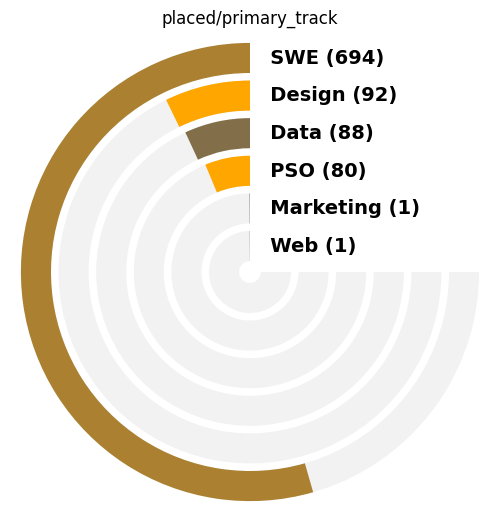

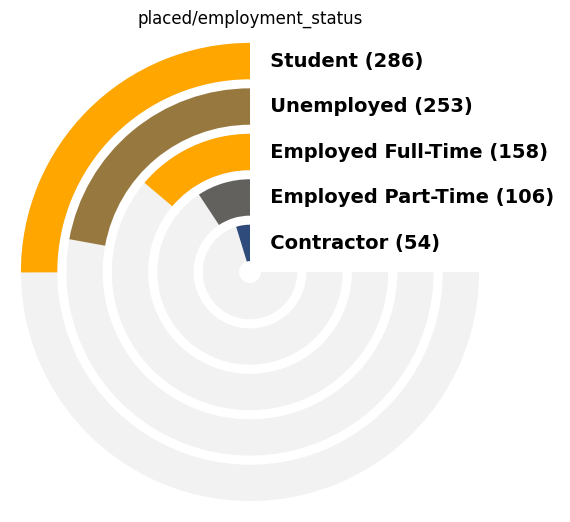

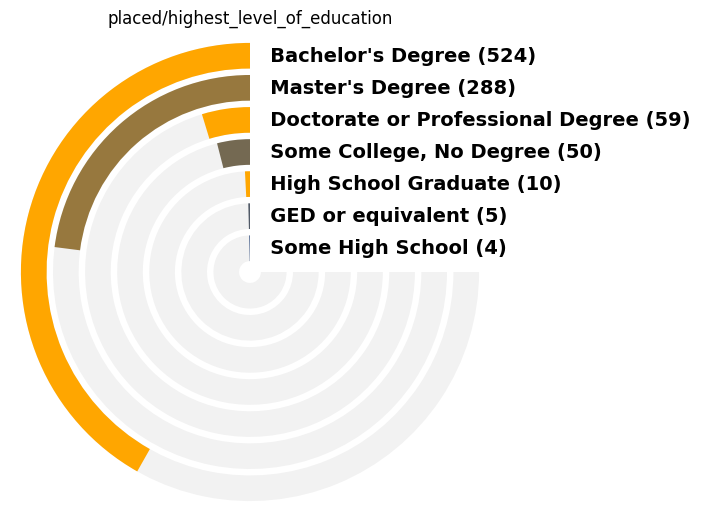

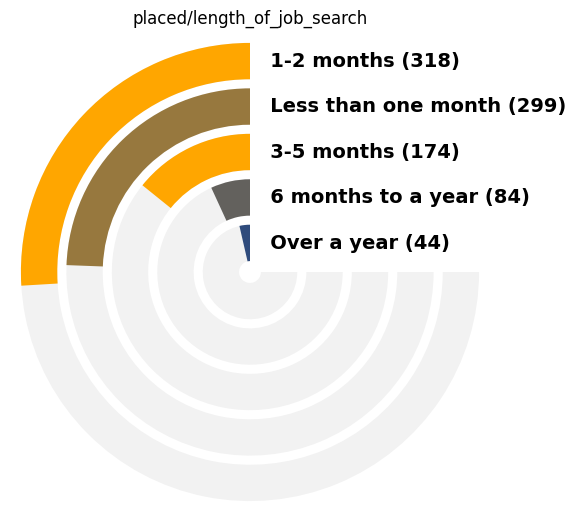

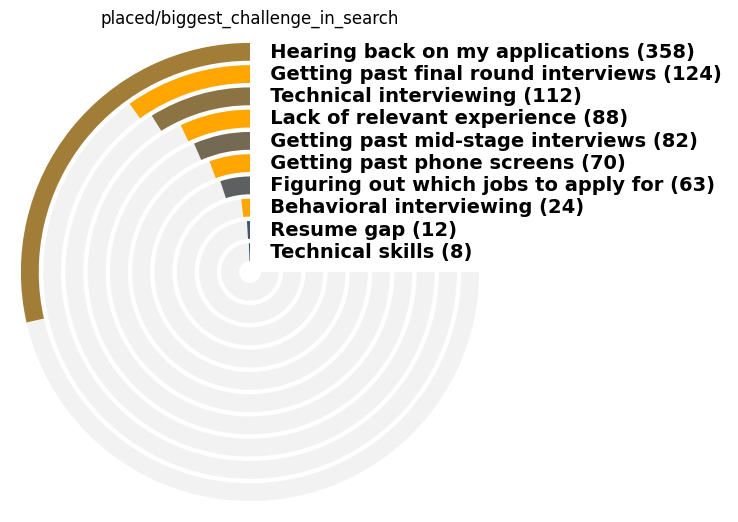

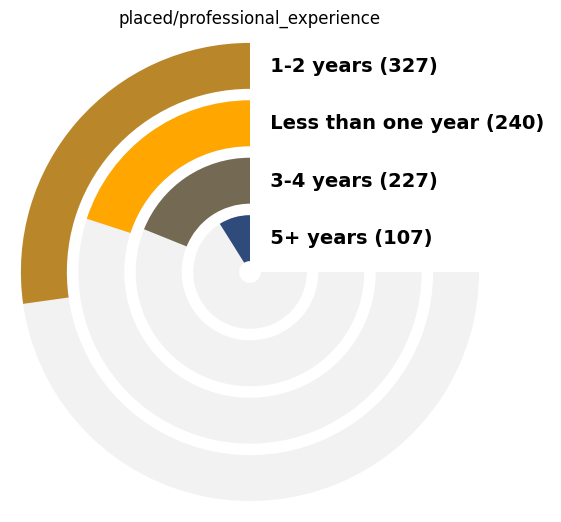

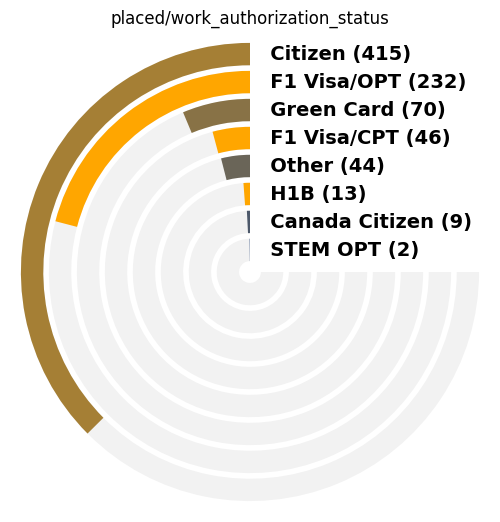

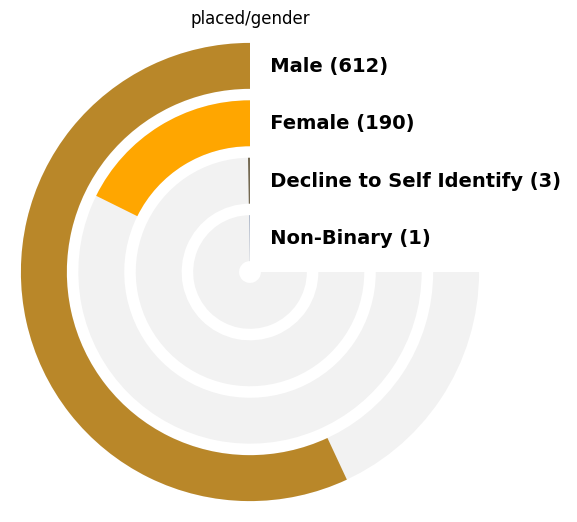

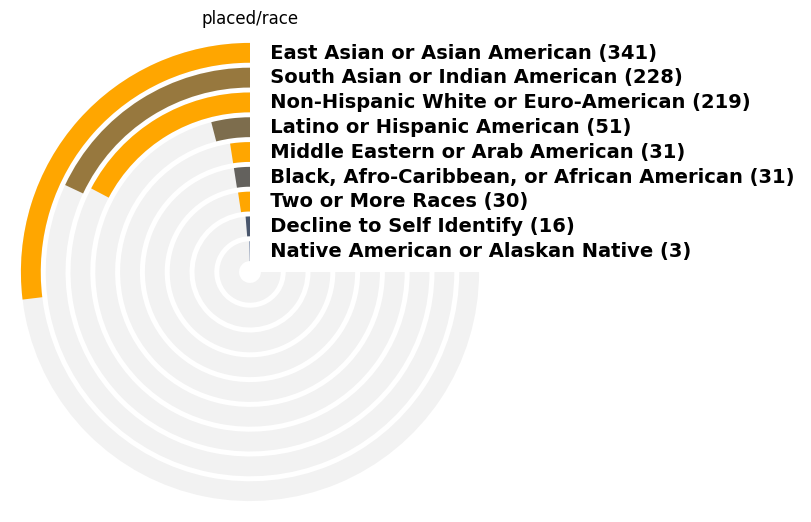

In [54]:
cols_name = ['primary_track', 'employment_status', 'highest_level_of_education', 'length_of_job_search',
             'biggest_challenge_in_search', 'professional_experience', 'work_authorization_status', 'gender', 'race']

for j in cols_name:
    df_temp = df[[j, 'placed']].copy()
    df_temp = df_temp[df_temp['placed'] == 1]

    radial_plot(df_temp[j])
    plt.title('placed/{}'.format(j))
    plt.savefig(fname='placed_{}.png'.format(j), dpi=300, bbox_inches='tight', transparent=True)
    plt.show()  # Show the plot before moving to the next one

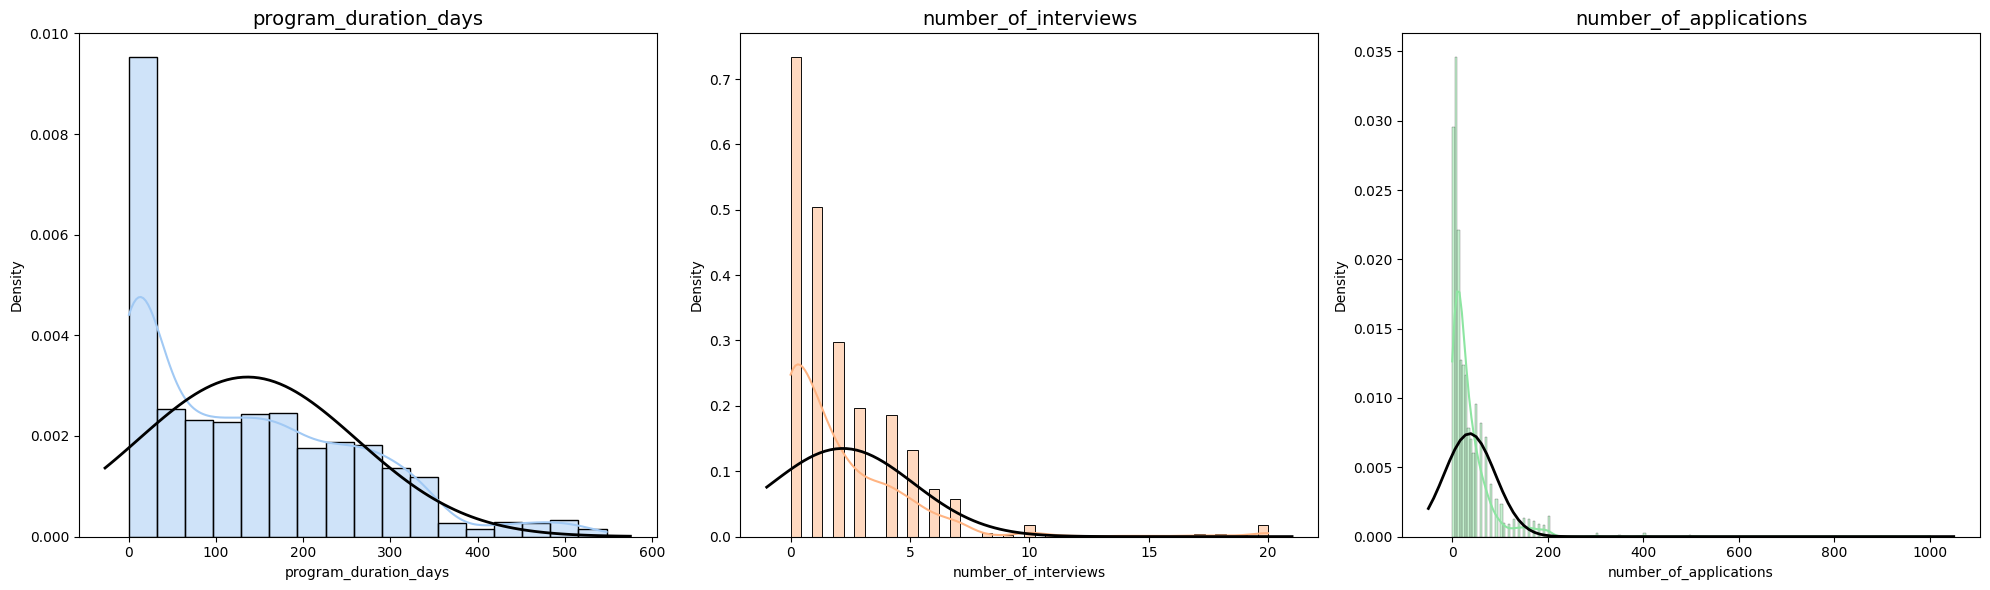

In [55]:
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 6))
columns = ['program_duration_days', 'number_of_interviews', 'number_of_applications']
for i, column in enumerate(columns, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[column], kde=True, stat='density', color=sns.color_palette('pastel')[i-1])
    mu, std = norm.fit(df[column].dropna())
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)

    plt.title(column, fontsize=14)
plt.tight_layout()
plt.show()

<ipython-input-56-7e44374e6c48>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(program_duration_days, ax=ax1, fit=norm, color='#FB8861')
<ipython-input-56-7e44374e6c48>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(number_of_interviews, ax=ax2, fit=norm, color='#56F9BB')
<ipython-input-56-7

Text(0.5, 1.0, 'number of applications')

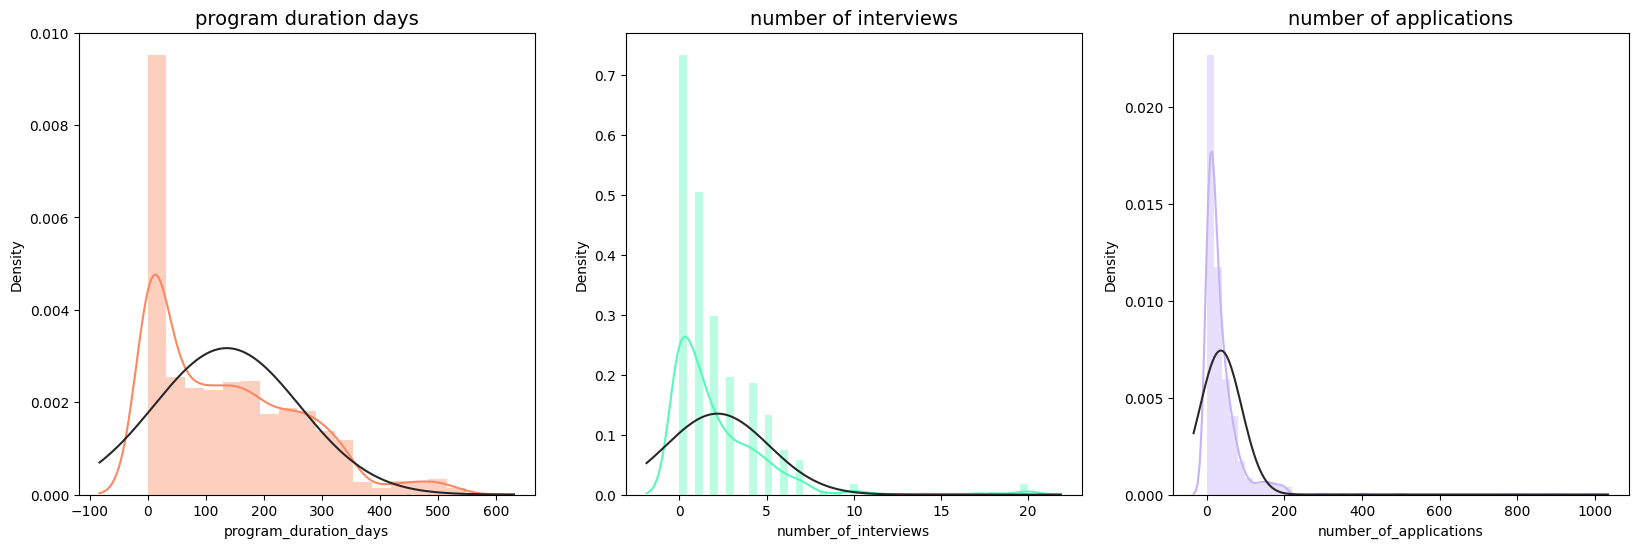

In [56]:
from scipy.stats import norm
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

program_duration_days = df['program_duration_days']
sns.distplot(program_duration_days, ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('program duration days', fontsize=14)

number_of_interviews = df['number_of_interviews']
sns.distplot(number_of_interviews, ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('number of interviews', fontsize=14)

number_of_applications = df['number_of_applications']
sns.distplot(number_of_applications, ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('number of applications', fontsize=14)

<ipython-input-57-66174d84dd4f>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(program_duration_days, ax=ax1, fit=norm, color='#FB8861')
<ipython-input-57-66174d84dd4f>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(number_of_interviews, ax=ax2, fit=norm, color='#56F9BB')
<ipython-input-57-6

Text(0.5, 1.0, 'number of applications \n (placed)')

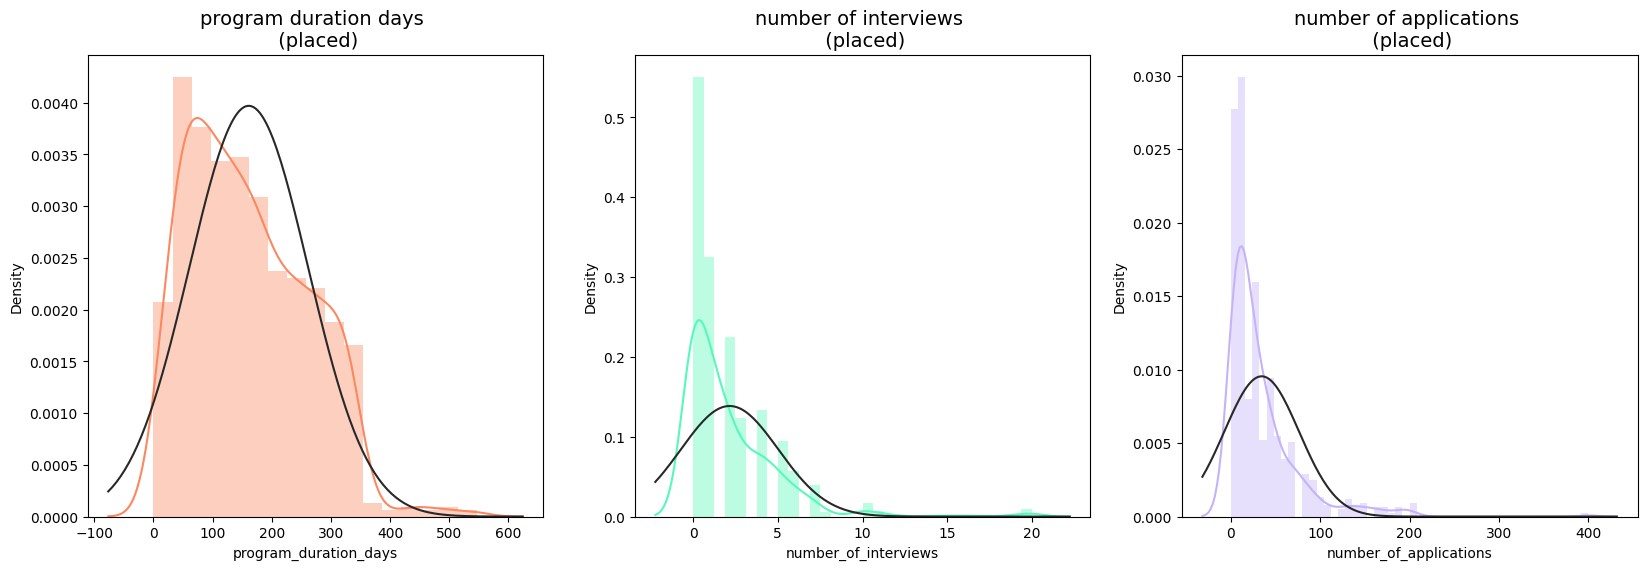

In [57]:
from scipy.stats import norm
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

program_duration_days = df['program_duration_days'][df['placed'] == 1]
sns.distplot(program_duration_days, ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('program duration days \n (placed)', fontsize=14)

number_of_interviews = df['number_of_interviews'][df['placed'] == 1]
sns.distplot(number_of_interviews, ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('number of interviews \n (placed)', fontsize=14)

number_of_applications = df['number_of_applications'][df['placed'] == 1]
sns.distplot(number_of_applications, ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('number of applications \n (placed)', fontsize=14)

<ipython-input-58-f8f7b0557cb7>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(program_duration_days, ax=ax1, fit=norm, color='#FB8861')
<ipython-input-58-f8f7b0557cb7>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(number_of_interviews, ax=ax2, fit=norm, color='#56F9BB')
<ipython-input-58-f

Text(0.5, 1.0, 'number of applications \n (not placed)')

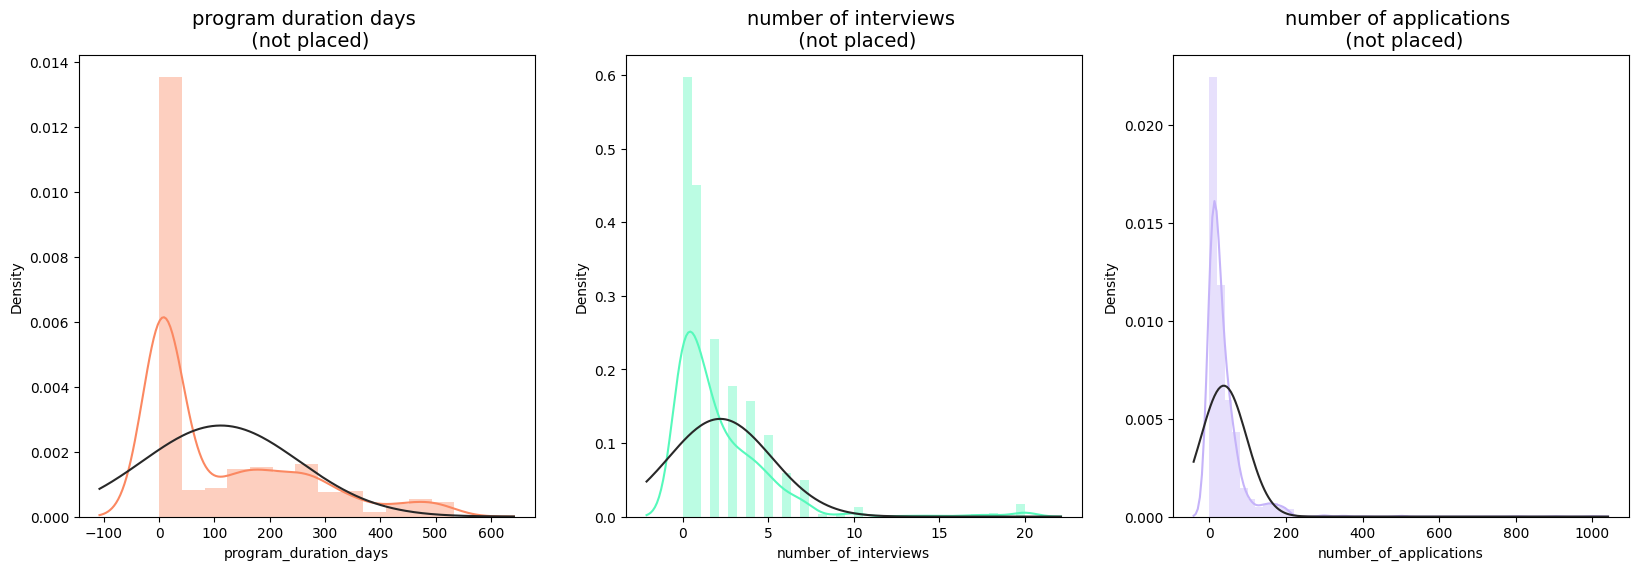

In [58]:
from scipy.stats import norm
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

program_duration_days = df['program_duration_days'][df['placed'] == 0]
sns.distplot(program_duration_days, ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('program duration days \n (not placed)', fontsize=14)

number_of_interviews = df['number_of_interviews'][df['placed'] == 0]
sns.distplot(number_of_interviews, ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('number of interviews \n (not placed)', fontsize=14)

number_of_applications = df['number_of_applications'][df['placed'] == 0]
sns.distplot(number_of_applications, ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('number of applications \n (not placed)', fontsize=14)

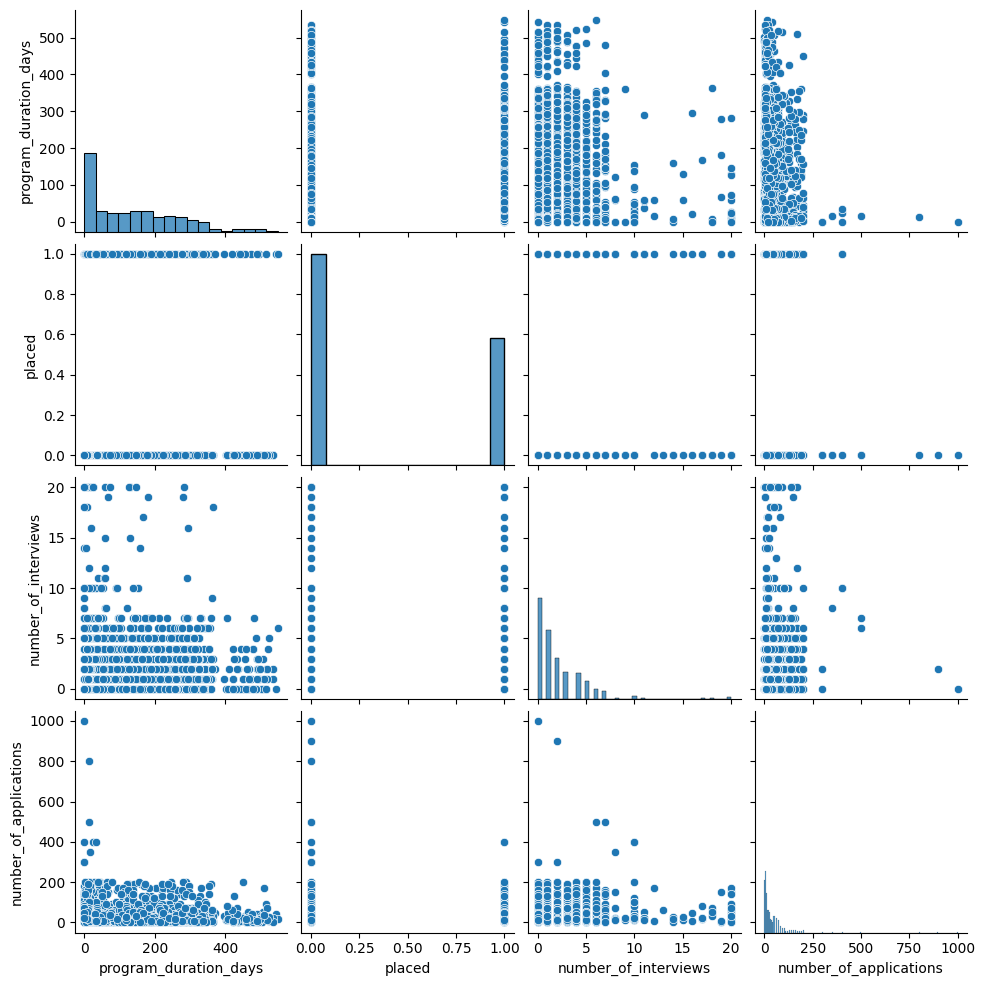

In [59]:
sns.pairplot(df)

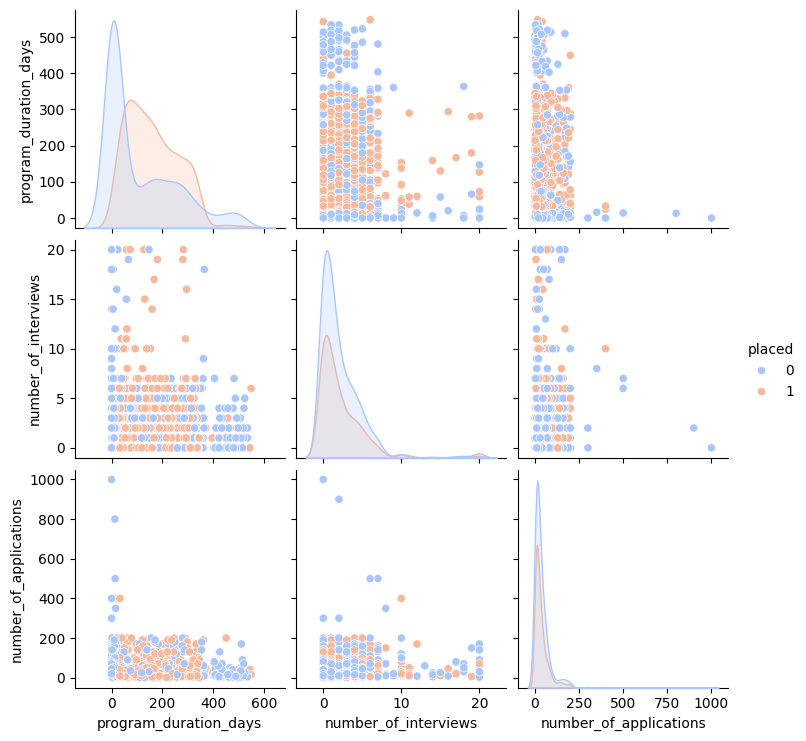

In [60]:
sns.pairplot(df, hue='placed', palette='coolwarm')